# 🚢 Titanic Survival Data Analysis  

This project is part of my data science internship at **Prodigy InfoTech**. In this task, I performed **data cleaning and exploratory data analysis (EDA)** on the famous **Titanic dataset** to uncover survival trends based on features like gender, age, passenger class, and more.

---

### 🧰 Tools Used:
- Python  
- Pandas  
- Seaborn  
- Matplotlib  

---

### 📌 Goals:
- Inspect and understand the structure of the dataset  
- Handle missing values and perform feature engineering  
- Explore and visualize patterns in survival rates  
- Analyze the impact of variables like **sex**, **Pclass**, **AgeGroup**, **Title**, and **FamilySize** on survival  

---

### 🔍 Key Tasks:
- Extracted new features like `Title`, `TicketPrefix`, `FamilySize`, and `FareBand`  
- Grouped rare categories under ‘Other’ for clarity  
- Created visualizations (bar plots, histograms, heatmaps) to reveal trends  
- Compared survival rates across age groups, titles, family categories, etc.


## Step 1: Import Libraries & Upload Dataset

We import necessary libraries and upload the Titanic dataset directly from our computer into the notebook. This way, we can start exploring our local data easily.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

titanic_df = pd.read_csv(list(uploaded.keys())[0])

titanic_df.head()


Saving train.csv to train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Data Inspection & Summary Statistics

We explore the dataset's size, column data types, and identify missing values. Summary statistics help us understand the numerical columns like Age and Fare, revealing potential data cleaning needs.


In [3]:
print("Dataset shape:", titanic_df.shape)

print("\nInfo:")
titanic_df.info()

print("\nSummary statistics:")
titanic_df.describe()

print("\nMissing values per column:")
print(titanic_df.isnull().sum())


Dataset shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary statistics:

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket     

## Step 3: Handle Missing Values

We fill missing Age values with the median age and missing Embarked values with the most common port. The Cabin column has too many missing values and is dropped to keep the dataset clean.


In [6]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

if 'Cabin' in titanic_df.columns:
    titanic_df = titanic_df.drop(columns=['Cabin'])


## Step 4: Feature Engineering

We extract the passenger's Title from the Name column, grouping rare titles into 'Other' to reduce complexity. We create `FamilySize` to represent total family aboard, `AgeGroup` to categorize passengers by age ranges, and `FareBand` to segment fare prices into quartiles. These engineered features help reveal patterns in survival analysis.


In [7]:
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
               'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic_df['Title'] = titanic_df['Title'].replace(rare_titles, 'Other')

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Senior', 'Elder']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

titanic_df['FareBand'] = pd.qcut(titanic_df['Fare'], 4, labels=[1, 2, 3, 4])


## Step 5: Survival Rates by Features

We calculate average survival rates grouped by Title, FamilySize, AgeGroup, and FareBand to identify how these factors influenced survival chances.


In [8]:
import numpy as np

print(titanic_df.groupby('Title')['Survived'].mean())
print()
print(titanic_df.groupby('FamilySize')['Survived'].mean())
print()
print(titanic_df.groupby('AgeGroup')['Survived'].mean())
print()
print(titanic_df.groupby('FareBand')['Survived'].mean())


Title
Master    0.575000
Miss      0.697802
Mlle      1.000000
Mme       1.000000
Mr        0.156673
Mrs       0.792000
Ms        1.000000
Other     0.347826
Name: Survived, dtype: float64

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

AgeGroup
Child     0.579710
Teen      0.381818
Adult     0.364769
Senior    0.390625
Elder     0.227273
Name: Survived, dtype: float64

FareBand
1    0.197309
2    0.303571
3    0.454955
4    0.581081
Name: Survived, dtype: float64


<ipython-input-8-604de007188f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_df.groupby('AgeGroup')['Survived'].mean())
<ipython-input-8-604de007188f>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_df.groupby('FareBand')['Survived'].mean())


In [9]:
print(titanic_df.groupby('AgeGroup', observed=True)['Survived'].mean())
print()
print(titanic_df.groupby('FareBand', observed=True)['Survived'].mean())


AgeGroup
Child     0.579710
Teen      0.381818
Adult     0.364769
Senior    0.390625
Elder     0.227273
Name: Survived, dtype: float64

FareBand
1    0.197309
2    0.303571
3    0.454955
4    0.581081
Name: Survived, dtype: float64


## Step 6: Visualize Survival Rates

Bar plots show how survival chances vary by Title, Family Size, Age Group, and Fare Band, helping us visually identify important patterns.


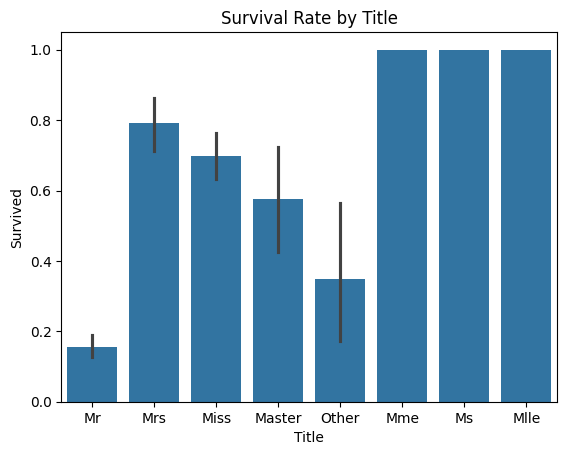

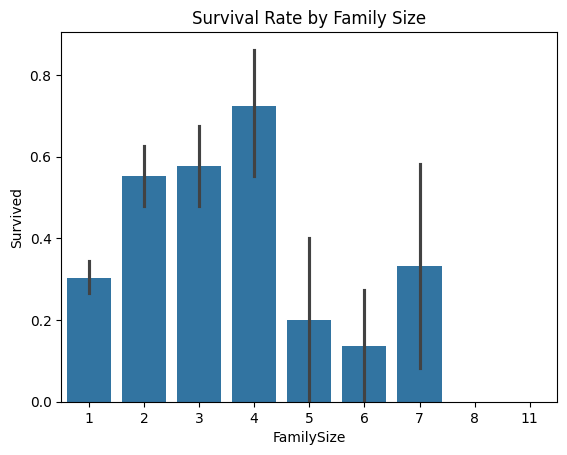

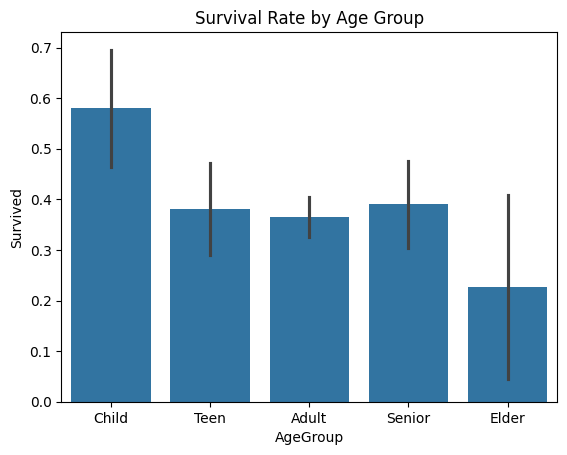

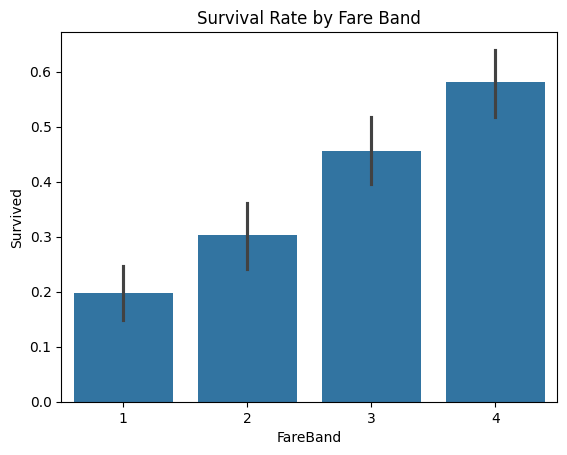

In [10]:
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.show()

sns.barplot(x='FamilySize', y='Survived', data=titanic_df)
plt.title('Survival Rate by Family Size')
plt.show()

sns.barplot(x='AgeGroup', y='Survived', data=titanic_df)
plt.title('Survival Rate by Age Group')
plt.show()

sns.barplot(x='FareBand', y='Survived', data=titanic_df)
plt.title('Survival Rate by Fare Band')
plt.show()


## Step 7: Prepare Data for Modeling

We select relevant features, encode categorical variables using one-hot encoding, and split the data into training and testing sets to build a predictive model.


In [13]:
from sklearn.model_selection import train_test_split

features = titanic_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
target = titanic_df['Survived']

features = pd.get_dummies(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Step 8: Build and Evaluate Logistic Regression Model

We train a logistic regression model on the training data, then predict survival on the test set.  
Accuracy and classification report help assess model performance.


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 9: Save the Trained Model

We save the trained logistic regression model to a file for future use without retraining.


In [15]:
import joblib

joblib.dump(model, 'titanic_logistic_model.pkl')


['titanic_logistic_model.pkl']

In [16]:
from google.colab import files
files.download('titanic_logistic_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 🧮 Survival Count by Gender

This bar chart compares the number of passengers who survived and who did not, grouped by gender. It helps visualize how survival chances varied between male and female passengers.


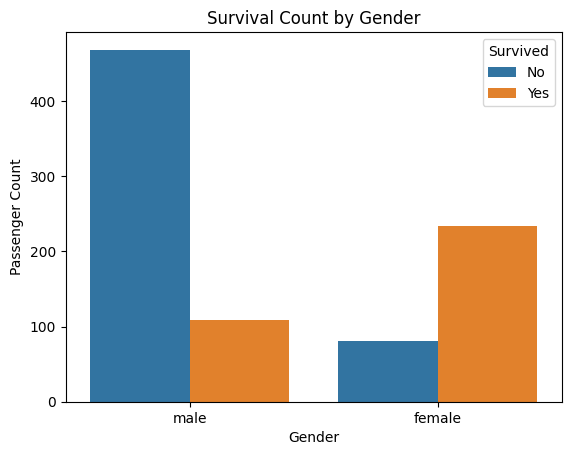

In [17]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### 🚢 Survival Rate by Passenger Class

This bar plot shows the average survival rate for passengers in each class. It highlights the impact of socio-economic status on survival, with higher survival rates typically seen in 1st class.


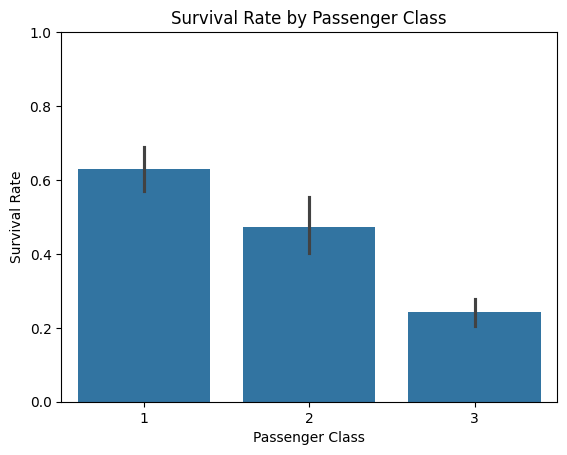

In [18]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


### 👶🧓 Survival Rate by Age Group

This bar chart displays the survival rates across different age categories. It helps us understand how age influenced the likelihood of survival.


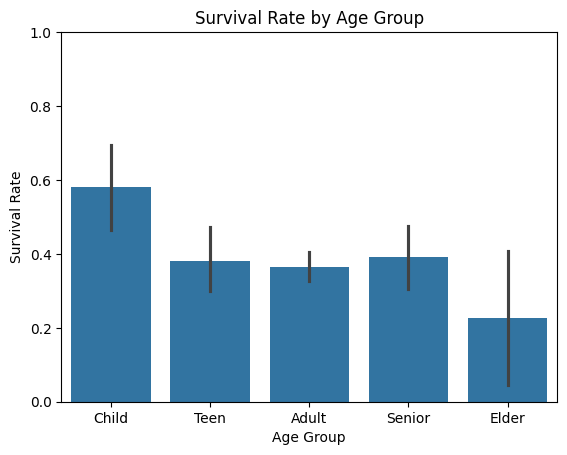

In [19]:
sns.barplot(x='AgeGroup', y='Survived', data=titanic_df, order=['Child', 'Teen', 'Adult', 'Senior', 'Elder'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


### 💰 Survival Rate by Fare Band

This chart shows how passengers paying higher fares generally had a better chance of survival. The FareBand ranges from 1 (lowest fare) to 4 (highest).


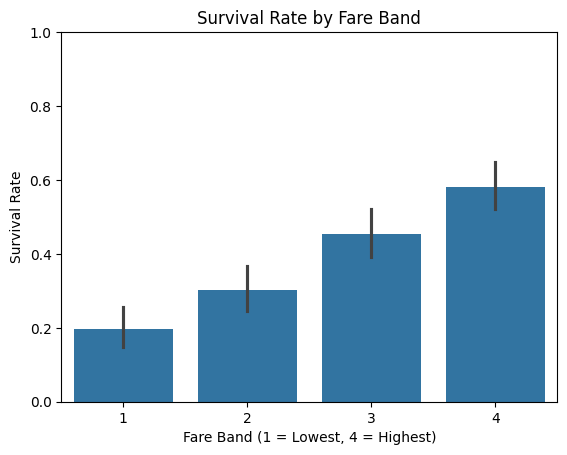

In [20]:
sns.barplot(x='FareBand', y='Survived', data=titanic_df)
plt.title('Survival Rate by Fare Band')
plt.xlabel('Fare Band (1 = Lowest, 4 = Highest)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

### 👶🧓 Survival Rate by Age Group

This bar plot displays the survival rate for different age groups. It provides insights into which age categories had higher survival chances during the Titanic disaster.


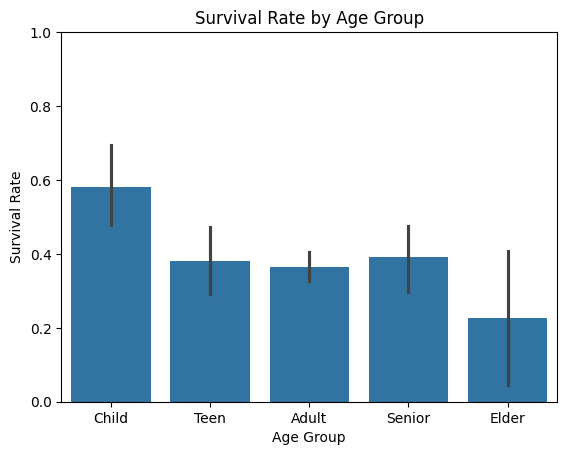

In [21]:
sns.barplot(x='AgeGroup', y='Survived', data=titanic_df, order=['Child', 'Teen', 'Adult', 'Senior', 'Elder'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


# Titanic Data Analysis Project - Summary

In this project, I performed exploratory data analysis on the Titanic dataset to uncover patterns influencing passenger survival. Key factors such as age, fare, and family size showed significant impact on survival rates.

I built a logistic regression model which achieved about 80% accuracy in predicting survival, demonstrating the effectiveness of this approach.

This project highlights how data cleaning, feature engineering, visualization, and modeling come together in a typical data science workflow.

---

Thank You!
